In [12]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np

In [15]:
def read_data(filename):
    from begepro.rw import CAENhandler, CAENhandler_new
    from begepro.dspro import filters as flt
    from begepro.dspro import bege_event as be

    evs, evn  = CAENhandler_new.get_compass_size(filename,calibrated=True)    
    collector = be.BEGeEvent(n_trace=evn,dim_trace=evs)
    rd        = CAENhandler.compassReader(filename,calibrated=True)
    
    counter = 0
    
    print('Start')
    while True:
        data = rd.get()
        if data is None: break

        raw_wf       = np.array(data['trace'])
        curr         = flt.curr_filter(raw_wf)
        pulse_height = data['pulseheight']
        energy       = data['energy']
        amplitude    = np.max(curr)
        avse         = amplitude / pulse_height
                
        collector.add_pulse_height(pulse_height)
        collector.add_energy(energy)
        collector.add_amplitude(amplitude)
        collector.add_avse(avse)
        collector.add_trace(raw_wf)
            
        counter += 1
        if counter%10000 == 0: print('--> {sgn} signals processed...'.format(sgn=counter))

    print('End')
    collector.update_index()
    
    return collector 

In [16]:
filename='/home/giachero/data/BEGe/compass/DataF_CH1@DT5725SB_10806_Std-232Th-3Bq-AEcalibration-im010421.bin'

coll=read_data(filename)

Start
--> 10000 signals processed...
--> 20000 signals processed...
--> 30000 signals processed...
--> 40000 signals processed...
--> 50000 signals processed...
--> 60000 signals processed...
--> 70000 signals processed...
--> 80000 signals processed...
--> 90000 signals processed...
--> 100000 signals processed...
--> 110000 signals processed...
--> 120000 signals processed...
--> 130000 signals processed...
End


In [117]:
nbits=14
nbins=2**14-1
calVec = [-0.090383 + 0.20574*i for i in range(2**14+1)]

<IPython.core.display.Javascript object>


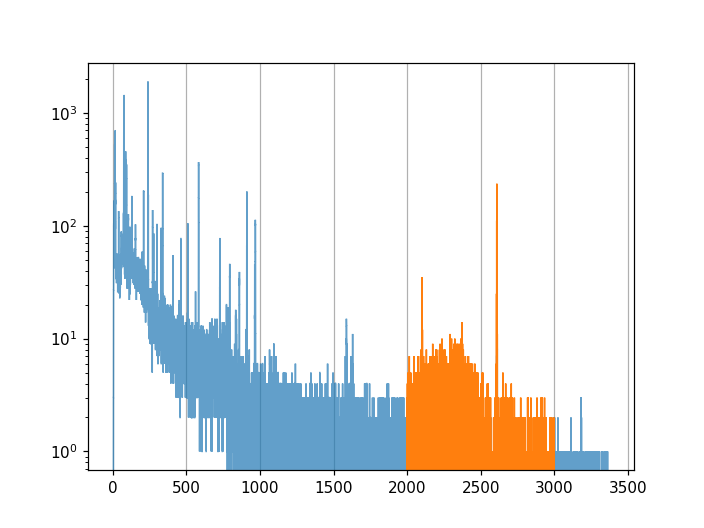

In [126]:
import pylab as plt
plt.figure()
plt.hist(coll.get_energies(), bins=calVec, histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')

In [148]:
cutmin=2000; cutmax=3000
index=np.where((coll.get_energies() > cutmin) & (coll.get_energies() < cutmax))[0]

In [128]:
coll2=coll.subset(index)

In [131]:
plt.hist(coll2.get_energies(), bins=calVec, histtype='step')

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-9.03830000e-02,  1.15357000e-01,  3.21097000e-01, ...,
         3.37034230e+03,  3.37054804e+03,  3.37075378e+03]),
 [<matplotlib.patches.Polygon at 0x7f2f6cbbf250>])

<IPython.core.display.Javascript object>


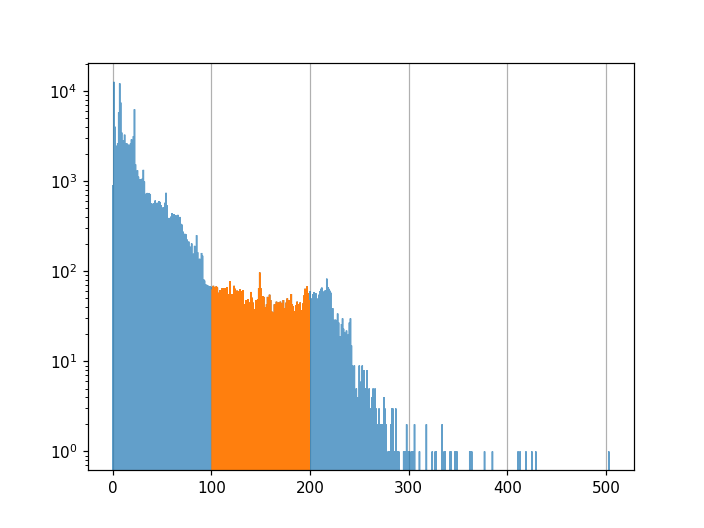

In [137]:
plt.figure()
plt.hist(coll.get_amplitudes(), bins=nbins, histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')

In [138]:
cutmin=100; cutmax=200
index=np.where((coll.get_amplitudes() > cutmin) & (coll.get_amplitudes() < cutmax))[0]

In [139]:
plt.hist(coll.subset(index).get_amplitudes(), bins=nbins, histtype='step')

(array([63.,  0.,  0., ...,  0.,  0., 48.]),
 array([101.        , 101.00598181, 101.01196362, ..., 198.98803638,
        198.99401819, 199.        ]),
 [<matplotlib.patches.Polygon at 0x7f2f6876eb90>])

<IPython.core.display.Javascript object>


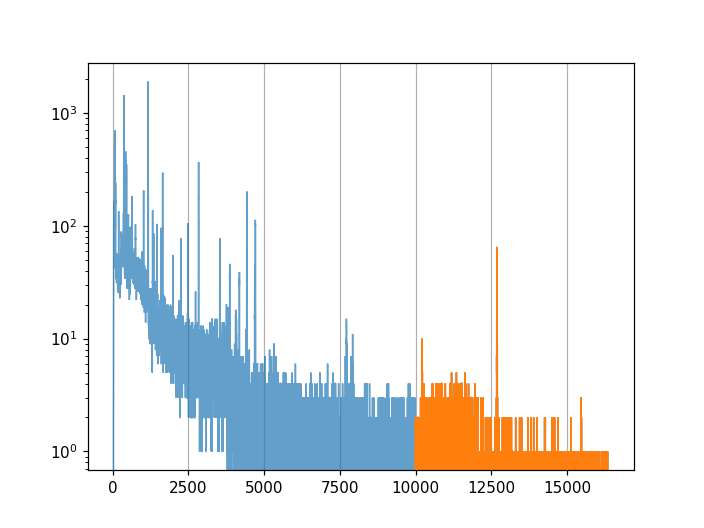

In [170]:
plt.figure()
plt.hist(coll.get_pulse_heights(), bins=2**14, range=(0,2**14), histtype='step', alpha=0.7)
plt.semilogy()
plt.grid(axis='x')

In [175]:
cutmin=10000; cutmax=12000
index=np.where((coll.get_pulse_heights() > cutmin) & (coll.get_pulse_heights() < cutmax))[0]

In [176]:
plt.hist(coll.subset(index).get_pulse_heights(), bins=2**14, range=(0,2**14), histtype='step')

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.6382e+04, 1.6383e+04,
        1.6384e+04]),
 [<matplotlib.patches.Polygon at 0x7f2f6a991250>])

In [173]:
trace=coll.subset(index).get_traces()

<IPython.core.display.Javascript object>


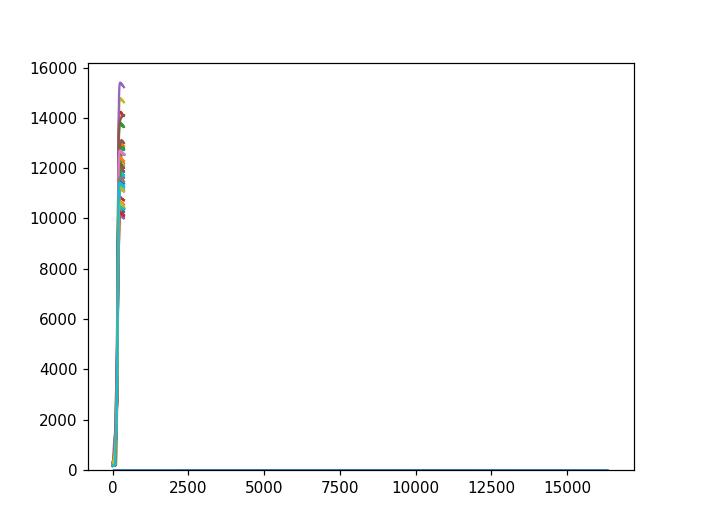

In [174]:
plt.figure()
for i in range(50):
    plt.plot(trace[i,:])